In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("testFeatures.csv")
train_data.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [3]:
#encoder: Kategorik -> numerik
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
# ürün sayısal hale getirme
urunSayisal = le.fit_transform(train_data.iloc[:,1])
urunSayisal_test = le.fit_transform(test_data.iloc[:, 2])

# üretim yerini sayısal hale getirme
uretimYeriSayisal = le.fit_transform(train_data.iloc[:,-3:-2])
uretimYeriSayisal_test = le.fit_transform(test_data.iloc[:,-3:-2])

#sehirleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
sehirSayisal = ohe.fit_transform(train_data["şehir"].values.reshape(-1,1)).toarray()
sehirSayisal_test = ohe.fit_transform(test_data["şehir"].values.reshape(-1,1)).toarray()

#marketleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
marketSayisal = ohe.fit_transform(train_data["market"].values.reshape(-1,1)).toarray()
marketSayisal_test = ohe.fit_transform(test_data["market"].values.reshape(-1,1)).toarray()

#ürün kategorisini sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
urunKategoriSayisal = ohe.fit_transform(train_data["ürün kategorisi"].values.reshape(-1,1)).toarray()
urunKategoriSayisal_test = ohe.fit_transform(test_data["ürün kategorisi"].values.reshape(-1,1)).toarray()

#tarihi sayısal hale getirme
train_data['tarih'] = pd.to_datetime(train_data['tarih'])
train_data["Yıl"] = train_data["tarih"].dt.year
train_data["Ay"] = train_data["tarih"].dt.month
train_data["Gün"] = train_data["tarih"].dt.day

# Test verisi tarihi sayısal hale getirme
test_data['tarih'] = pd.to_datetime(test_data['tarih'])
test_data["Yıl"] = test_data["tarih"].dt.year
test_data["Ay"] = test_data["tarih"].dt.month
test_data["Gün"] = test_data["tarih"].dt.day

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
#numpy dizileri dataframe donusumu
urunSayisal = pd.DataFrame(data = urunSayisal, index = range(227520), columns=["ürün"])
uretimYeriSayisal = pd.DataFrame(data = uretimYeriSayisal, index = range(227520), columns=["üYeri"])
sehirSayisal = pd.DataFrame(data = sehirSayisal, index = range(227520), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal = pd.DataFrame(data = marketSayisal, index = range(227520), columns=["marketB","marketC","marketM"])
urunKategoriSayisal = pd.DataFrame(data = urunKategoriSayisal, index = range(227520), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])

#Test verisi numpy dizileri dataframe donusumu
urunSayisal_test = pd.DataFrame(data = urunSayisal_test, index = range(45504), columns=["ürün"])
uretimYeriSayisal_test = pd.DataFrame(data = uretimYeriSayisal_test, index = range(45504), columns=["üYeri"])
sehirSayisal_test = pd.DataFrame(data = sehirSayisal_test, index = range(45504), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal_test = pd.DataFrame(data = marketSayisal_test, index = range(45504), columns=["marketB","marketC","marketM"])
urunKategoriSayisal_test = pd.DataFrame(data = urunKategoriSayisal_test, index = range(45504), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])


In [6]:
#dataframe birlestirme islemi
b1= pd.concat([sehirSayisal, train_data.iloc[:,-3:]], axis=1)
b2= pd.concat([marketSayisal, b1], axis=1)
b3= pd.concat([uretimYeriSayisal, b2], axis=1)
b4 = pd.concat([train_data.iloc[:,2], b3], axis=1)
b5= pd.concat([urunSayisal, b4], axis=1)
numerikVeri= pd.concat([urunKategoriSayisal, b5], axis=1)
numerikVeri = numerikVeri.drop(["Gün"], axis=1)

In [7]:
#Testverisi dataframe birlestirme islemi
b1_test= pd.concat([sehirSayisal_test, test_data.iloc[:,-3:]], axis=1)
b2_test= pd.concat([marketSayisal_test, b1_test], axis=1)
b3_test= pd.concat([uretimYeriSayisal_test, b2_test], axis=1)
b4_test= pd.concat([test_data.iloc[:,3], b3_test], axis=1)
b5_test= pd.concat([urunSayisal_test, b4_test], axis=1)
numerikVeri_test= pd.concat([urunKategoriSayisal_test, b5_test], axis=1)
numerikVeri_test = numerikVeri_test.drop(["Gün"], axis=1)

In [8]:
# veri setindeki istenen fiyat listesi
y=train_data.iloc[:,4]

In [9]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
"""scaler.fit(numerikVeri)
x_train = scaler.transform(numerikVeri)
x_test = scaler.transform(numerikVeri_test)
"""

x_train = scaler.fit_transform(numerikVeri)
x_test = scaler.transform(numerikVeri_test)


In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(64))
model.add(Dense(1))

model.compile(optimizer="adamax", loss="mse")

model.fit(x_train, y, batch_size=500,  epochs=100)

Epoch 1/100
456/456 [==============================] - 8s 15ms/step - loss: 77.5097
Epoch 2/100
456/456 [==============================] - 7s 15ms/step - loss: 53.5325
Epoch 3/100
456/456 [==============================] - 6s 14ms/step - loss: 47.2007
Epoch 4/100
456/456 [==============================] - 7s 15ms/step - loss: 43.2279
Epoch 5/100
456/456 [==============================] - 7s 15ms/step - loss: 38.1974
Epoch 6/100
456/456 [==============================] - 7s 15ms/step - loss: 29.1578
Epoch 7/100
456/456 [==============================] - 7s 16ms/step - loss: 18.2856
Epoch 8/100
456/456 [==============================] - 7s 14ms/step - loss: 13.0299
Epoch 9/100
456/456 [==============================] - 7s 15ms/step - loss: 9.9041
Epoch 10/100
456/456 [==============================] - 6s 14ms/step - loss: 7.8925
Epoch 11/100
456/456 [==============================] - 5s 11ms/step - loss: 6.8529
Epoch 12/100
456/456 [==============================] - 5s 10ms/step - loss: 

456/456 [==============================] - 8s 17ms/step - loss: 0.1694
Epoch 99/100
456/456 [==============================] - 7s 16ms/step - loss: 0.2015
Epoch 100/100
456/456 [==============================] - 8s 17ms/step - loss: 0.2838


<AxesSubplot:>

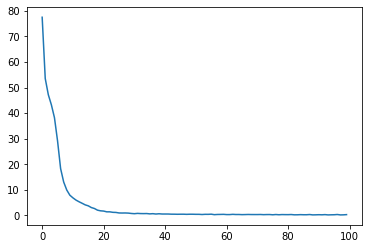

In [14]:
import seaborn as sbn
loss= model.history.history["loss"]
sbn.lineplot(x=range(len(loss)), y=loss)

In [15]:
kayipVerisi = pd.DataFrame(model.history.history)

In [16]:
kayipVerisi.head()

,loss
0,77.509712
1,53.532494
2,47.200695
3,43.227856
4,38.197372


<AxesSubplot:>

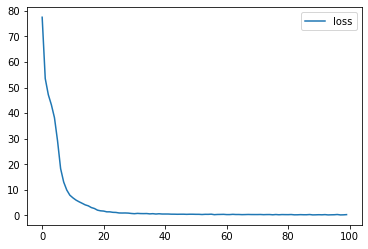

In [17]:
kayipVerisi.plot()

In [18]:
trainLoss= model.evaluate(x_train, y, verbose=0)
trainLoss

0.20276987552642822

In [19]:
testTahminleri = model.predict(x_test)
testTahminleri

array([[114.898125],
       [ 38.184856],
       [ 39.960575],
       ...,
       [ 74.09682 ],
       [ 70.21358 ],
       [ 76.01496 ]], dtype=float32)

In [20]:
#tahminleri yazdirma
tahmin = pd.DataFrame(data = testTahminleri, index = range(45504), columns=["ürün fiyatı"])
import sys
tahmin.to_csv(sys.stdout,columns=["ürün fiyatı"])
tahmin.to_csv("predict15.csv")

,ürün fiyatı
0,114.898125
1,38.184856
2,39.960575
3,22.723051
4,40.46053
5,17.756731
6,19.450857
7,41.73561
8,38.29695
9,83.57964
10,14.071231
11,36.636494
12,34.550144
13,31.74934
14,27.692808
15,13.859706
16,39.683624
17,26.589937
18,28.455214
19,21.791975
20,23.229338
21,24.47248
22,46.3662
23,20.060339
24,19.20968
25,14.571361
26,22.341255
27,10.838104
28,25.005674
29,7.9878783
30,9.581573
31,8.802586
32,3.264301
33,6.527219
34,12.088741
35,5.332167
36,7.1502886
37,40.559986
38,17.075562
39,14.012787
40,23.463173
41,23.113426
42,12.037022
43,39.484165
44,23.801346
45,57.10739
46,55.483265
47,26.415892
48,40.11842
49,49.520775
50,39.555126
51,40.618504
52,13.58704
53,49.58423
54,83.15144
55,51.974945
56,12.62327
57,19.064093
58,21.984922
59,24.098684
60,13.732038
61,15.9532
62,22.03231
63,23.986015
64,13.027284
65,16.972734
66,10.88088
67,10.478995
68,27.449146
69,28.77258
70,14.099413
71,18.787544
72,16.073412
73,13.442218
74,50.820347
75,48.480713
76,48.35178
77,53.155296
78,64.20

3741,25.409466
3742,8.283001
3743,10.315903
3744,8.556231
3745,2.6618242
3746,5.6332865
3747,10.466302
3748,4.9395037
3749,8.069572
3750,38.251842
3751,16.94645
3752,12.627003
3753,20.878567
3754,20.481771
3755,11.821493
3756,38.855415
3757,26.488407
3758,59.491596
3759,58.49315
3760,27.33282
3761,35.990604
3762,47.82238
3763,38.46935
3764,42.914898
3765,12.675246
3766,53.72976
3767,76.68677
3768,53.694267
3769,14.413109
3770,17.622126
3771,19.837818
3772,21.896687
3773,13.267402
3774,17.386242
3775,19.684217
3776,24.053589
3777,15.024452
3778,17.479046
3779,10.19585
3780,10.468406
3781,29.541962
3782,27.21262
3783,14.484013
3784,15.407061
3785,16.22359
3786,13.567534
3787,51.851154
3788,53.715397
3789,57.393616
3790,51.534935
3791,58.018322
3792,117.196045
3793,38.694702
3794,40.401417
3795,23.253082
3796,41.155323
3797,17.724815
3798,19.916416
3799,42.02306
3800,38.968655
3801,84.7794
3802,14.454216
3803,37.430172
3804,35.20099
3805,32.20361
3806,28.0755
3807,14.232578
3808,40.38127


7303,5.0336533
7304,7.6477404
7305,40.192417
7306,16.04681
7307,12.938802
7308,22.917831
7309,21.269573
7310,12.536831
7311,37.550777
7312,24.862967
7313,52.888733
7314,54.859737
7315,29.225872
7316,41.03471
7317,52.24615
7318,39.86054
7319,40.40497
7320,14.053833
7321,58.5155
7322,84.34164
7323,55.0057
7324,13.313578
7325,17.38418
7326,21.828596
7327,25.859371
7328,13.915932
7329,16.707962
7330,22.422482
7331,26.633944
7332,14.541733
7333,15.010609
7334,10.880568
7335,10.787003
7336,24.643948
7337,28.88725
7338,13.353846
7339,14.682864
7340,15.898892
7341,13.411322
7342,45.500866
7343,46.76977
7344,55.988346
7345,50.503788
7346,58.372818
7347,116.091515
7348,40.826603
7349,40.096897
7350,25.223549
7351,41.17454
7352,18.334764
7353,20.371643
7354,42.64448
7355,41.166153
7356,81.37992
7357,14.483224
7358,37.1561
7359,31.041035
7360,32.04306
7361,29.25606
7362,15.941277
7363,43.006138
7364,27.22637
7365,29.705978
7366,21.28621
7367,20.579351
7368,25.32333
7369,44.457584
7370,22.26861
737

12302,17.846773
12303,22.882822
12304,24.151451
12305,15.3833885
12306,17.503815
12307,23.957188
12308,25.608778
12309,14.705051
12310,18.28186
12311,11.684716
12312,11.603831
12313,31.026602
12314,27.038967
12315,14.818492
12316,18.104733
12317,19.162508
12318,13.0642395
12319,49.552296
12320,51.692516
12321,57.544773
12322,50.360897
12323,61.14707
12324,121.61769
12325,38.24456
12326,38.313618
12327,24.509977
12328,47.554012
12329,19.752827
12330,21.232922
12331,39.42671
12332,49.399647
12333,81.88644
12334,16.15089
12335,37.459835
12336,30.888428
12337,34.161488
12338,28.056536
12339,15.647343
12340,39.979107
12341,30.384237
12342,27.376858
12343,22.145466
12344,21.72288
12345,23.782253
12346,49.76231
12347,27.273838
12348,18.515352
12349,17.019634
12350,23.070278
12351,12.186589
12352,24.886372
12353,7.9681892
12354,10.756558
12355,9.5692005
12356,2.93387
12357,5.683118
12358,12.077855
12359,5.1397085
12360,8.526276
12361,43.13189
12362,17.411089
12363,12.9088335
12364,23.394054
12

17044,23.873192
17045,14.617018
17046,17.764008
17047,22.97208
17048,24.168802
17049,13.282503
17050,17.868734
17051,11.680656
17052,12.0051
17053,28.274752
17054,29.683514
17055,16.510677
17056,18.606157
17057,17.790073
17058,14.821452
17059,53.738377
17060,52.82618
17061,50.908005
17062,49.580433
17063,62.72144
17064,124.203545
17065,41.87131
17066,42.709915
17067,23.599081
17068,46.987965
17069,20.43103
17070,22.052317
17071,42.43343
17072,40.66956
17073,76.482056
17074,14.271945
17075,40.09357
17076,33.85898
17077,31.923695
17078,27.815603
17079,16.276844
17080,40.869835
17081,30.836838
17082,31.26714
17083,23.131273
17084,22.586945
17085,25.850468
17086,47.117054
17087,22.690075
17088,21.63007
17089,17.755901
17090,24.283583
17091,10.295933
17092,30.331264
17093,9.230288
17094,10.800846
17095,9.250771
17096,2.997655
17097,6.3321543
17098,12.865598
17099,5.8158145
17100,9.835386
17101,47.7683
17102,21.819218
17103,15.916607
17104,23.466297
17105,24.148338
17106,13.58699
17107,44.91

21715,28.79055
21716,16.889656
21717,20.070976
21718,18.123438
21719,15.608718
21720,51.33784
21721,58.089245
21722,58.505726
21723,56.199146
21724,62.705715
21725,119.36954
21726,40.998314
21727,39.588047
21728,23.929071
21729,48.67722
21730,17.815111
21731,23.643059
21732,42.194454
21733,43.90232
21734,78.990395
21735,15.260975
21736,37.297466
21737,35.3875
21738,33.258854
21739,29.943232
21740,16.135084
21741,42.472916
21742,30.691486
21743,28.657455
21744,25.281212
21745,25.343708
21746,24.843315
21747,45.84054
21748,24.235983
21749,17.739693
21750,16.981121
21751,23.641327
21752,9.95691
21753,28.853115
21754,9.593809
21755,10.1306305
21756,9.719221
21757,2.476717
21758,6.079567
21759,13.163384
21760,5.7456083
21761,8.216784
21762,43.81055
21763,17.125546
21764,14.187948
21765,26.535522
21766,22.339851
21767,15.07459
21768,45.519703
21769,31.437155
21770,60.589466
21771,56.459797
21772,28.468796
21773,43.14507
21774,52.76215
21775,48.801235
21776,44.441174
21777,14.799536
21778,54.

26299,16.784124
26300,17.994326
26301,15.260056
26302,51.21626
26303,52.49799
26304,62.83195
26305,56.721104
26306,65.09309
26307,128.0161
26308,45.812088
26309,46.57772
26310,28.237814
26311,46.42004
26312,21.105495
26313,23.337631
26314,49.07812
26315,46.320957
26316,90.478325
26317,16.808535
26318,43.27557
26319,33.466736
26320,37.55804
26321,33.885944
26322,17.915474
26323,48.206432
26324,31.853897
26325,34.453945
26326,24.315754
26327,23.335114
26328,28.509668
26329,49.5602
26330,25.084301
26331,20.218582
26332,17.096748
26333,22.286463
26334,10.593313
26335,29.474012
26336,9.553484
26337,10.868086
26338,9.104939
26339,2.6248782
26340,6.712601
26341,14.196237
26342,7.1064744
26343,8.743921
26344,46.559483
26345,19.78814
26346,15.883304
26347,26.36678
26348,23.869186
26349,14.342834
26350,42.805065
26351,30.642187
26352,60.236324
26353,61.223785
26354,31.971287
26355,51.58885
26356,51.792744
26357,47.04027
26358,44.938663
26359,14.665325
26360,56.76858
26361,96.06122
26362,56.0067


30975,48.730526
30976,41.12894
30977,89.972176
30978,19.795736
30979,46.506878
30980,36.102425
30981,41.499447
30982,37.206005
30983,19.056915
30984,55.390194
30985,37.114456
30986,37.632404
30987,26.755844
30988,26.404982
30989,30.011923
30990,56.553097
30991,29.727703
30992,19.622673
30993,20.125053
30994,26.750341
30995,11.101446
30996,36.575184
30997,17.18128
30998,11.993519
30999,10.244523
31000,2.8489194
31001,7.060684
31002,13.55094
31003,6.0067244
31004,8.992701
31005,44.31132
31006,22.027866
31007,16.366146
31008,27.270508
31009,30.075804
31010,15.418209
31011,53.87452
31012,34.0426
31013,63.051376
31014,62.30005
31015,34.367424
31016,51.534325
31017,57.995163
31018,43.14015
31019,42.731174
31020,16.613144
31021,62.785423
31022,102.51972
31023,72.455986
31024,15.144014
31025,21.954472
31026,23.488308
31027,28.844406
31028,15.545073
31029,19.891392
31030,24.81505
31031,28.102068
31032,17.888977
31033,20.46098
31034,12.15023
31035,13.443905
31036,35.291733
31037,41.175014
31038,

35772,18.576275
35773,21.19957
35774,12.283699
35775,12.13873
35776,31.434328
35777,33.66989
35778,17.632965
35779,19.481178
35780,20.598751
35781,17.782772
35782,61.921715
35783,58.097206
35784,67.07561
35785,60.13174
35786,71.04391
35787,136.91788
35788,56.30193
35789,46.41876
35790,27.463036
35791,51.172325
35792,22.411621
35793,25.835297
35794,55.18587
35795,47.366703
35796,94.22768
35797,20.538113
35798,53.81203
35799,37.02876
35800,41.56815
35801,38.080288
35802,18.760666
35803,54.723633
35804,39.017464
35805,40.842
35806,28.99199
35807,28.576492
35808,30.789833
35809,55.28932
35810,29.234356
35811,20.878597
35812,18.40789
35813,28.647285
35814,11.55113
35815,34.484516
35816,16.682663
35817,11.855892
35818,10.340633
35819,3.4271204
35820,7.829754
35821,14.343341
35822,5.901463
35823,12.725586
35824,40.55179
35825,18.362816
35826,18.341282
35827,29.174675
35828,27.208035
35829,17.591084
35830,48.46265
35831,31.650717
35832,62.93182
35833,66.84138
35834,33.11024
35835,52.032066
358

40296,26.204681
40297,57.072918
40298,56.736996
40299,110.812836
40300,24.034384
40301,55.205498
40302,36.294254
40303,44.326286
40304,40.190998
40305,19.385254
40306,50.827633
40307,37.48617
40308,38.273754
40309,28.57631
40310,28.60168
40311,33.72277
40312,60.607845
40313,35.936264
40314,21.112833
40315,18.787449
40316,27.913359
40317,13.124905
40318,35.91949
40319,15.987654
40320,12.878133
40321,11.397129
40322,3.5387177
40323,7.2216544
40324,14.299436
40325,6.372769
40326,15.837416
40327,44.69666
40328,22.740225
40329,17.663033
40330,28.133265
40331,30.483871
40332,16.344599
40333,49.449078
40334,38.291973
40335,65.76893
40336,80.00405
40337,34.84379
40338,56.48189
40339,59.727753
40340,51.898426
40341,51.772236
40342,17.0225
40343,66.71743
40344,98.449745
40345,64.48448
40346,18.314518
40347,21.38649
40348,27.265194
40349,32.850307
40350,15.398121
40351,22.903816
40352,29.807877
40353,31.718836
40354,18.910269
40355,21.827665
40356,15.349367
40357,13.642008
40358,34.823696
40359,3

45295,33.896214
45296,14.439198
45297,12.490324
45298,10.4807625
45299,3.1184402
45300,8.2354555
45301,15.743491
45302,8.203145
45303,11.732178
45304,51.230366
45305,23.474798
45306,20.766441
45307,30.983006
45308,26.918072
45309,18.29235
45310,48.31766
45311,37.45524
45312,68.29442
45313,70.10194
45314,35.617393
45315,57.788982
45316,58.566235
45317,53.948452
45318,52.595654
45319,16.554998
45320,64.88227
45321,107.4569
45322,63.04391
45323,18.1551
45324,21.10497
45325,29.177929
45326,28.755531
45327,17.062082
45328,23.169744
45329,28.487793
45330,31.007195
45331,19.089783
45332,24.032753
45333,11.908075
45334,12.770303
45335,38.38182
45336,33.739532
45337,18.789516
45338,20.711388
45339,20.126331
45340,19.137285
45341,69.05186
45342,68.29627
45343,68.37608
45344,73.26546
45345,85.704254
45346,140.45718
45347,45.918068
45348,55.535545
45349,32.235184
45350,56.444576
45351,25.479443
45352,28.911665
45353,52.049946
45354,48.723274
45355,102.07529
45356,19.766788
45357,50.73405
45358,38.